In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap



In [3]:
data = pd.read_csv("../../../Downloads/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct", sep='\t', skiprows=2, index_col = 0)  # Skip the first 2 header lines


In [4]:
data

,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,DDX11L1,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.166403,0.000000,0.000000,0.000000,0.00000
ENSG00000227232.5,WASH7P,4.064030,3.371110,2.68549,4.04762,3.90076,3.639630,5.16375,1.43859,1.69285,...,5.932980,6.13265,4.193780,5.926310,3.062480,4.702530,6.272550,7.190010,5.745540,2.64743
ENSG00000278267.1,MIR6859-1,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
ENSG00000243485.5,MIR1302-2HG,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.054223,0.000000,0.000000,0.000000,0.00000
ENSG00000237613.2,FAM138A,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,MT-ND6,3517.220000,3598.090000,6637.79000,6374.49000,4972.73000,4635.000000,8275.20000,9631.77000,8319.14000,...,8919.460000,8113.22000,9764.490000,5477.360000,9628.750000,1676.590000,2520.410000,3644.000000,2237.430000,960.29100
ENSG00000210194.1,MT-TE,11.903800,11.203400,24.41390,22.65940,20.58800,18.257600,27.50560,40.58860,31.35490,...,32.932100,31.33400,35.456000,24.934900,33.496300,2.871770,5.795670,10.370100,5.724510,3.49736
ENSG00000198727.2,MT-CYB,23839.100000,25511.700000,28799.40000,12919.40000,15943.20000,13051.500000,23663.20000,32931.80000,28346.70000,...,19058.200000,17223.10000,24521.300000,11578.600000,27193.100000,15337.800000,19868.500000,15025.000000,12803.400000,2305.49000


In [5]:
#selecting ERG
ERN_genes_df = pd.read_excel('ERN_genes_not_changes.xlsx')
ERN_genes = ERN_genes_df['Gene']
ERN_genes_df.shape

(318, 4)

In [6]:
ERN_tissue = data[data['Description'].isin(ERN_genes)]
print(ERN_tissue.shape)
ERN_tissue

(318, 55)


,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000116254.17,CHD5,0.187216,0.184919,0.154762,1.701810,1.701170,3.735600,0.824039,23.846700,48.567500,...,0.226466,0.312955,0.398840,0.165016,0.730706,50.955100,0.242482,0.490493,0.420977,0.042965
ENSG00000116731.22,PRDM2,18.281000,15.581600,10.414900,21.983400,18.615000,21.580400,26.567300,8.707180,12.396300,...,21.587700,21.897000,16.537900,15.464500,10.481600,17.123400,25.381300,28.728900,25.433200,7.175160
ENSG00000159339.13,PADI4,0.399809,1.193280,0.092718,0.260119,0.214104,0.108501,0.297247,0.233281,0.320253,...,0.114668,0.088717,0.241536,35.566900,0.169893,0.301264,0.479274,0.284452,0.254331,196.026000
ENSG00000127483.17,HP1BP3,80.569200,74.706900,57.894200,103.319000,92.506300,106.689000,91.846200,30.509800,33.805000,...,66.152000,66.925800,71.222300,81.341900,54.191300,64.876400,118.723000,141.779000,121.860000,16.607900
ENSG00000004487.15,KDM1A,46.844800,38.697800,44.815100,43.332400,41.621300,46.575300,59.281300,17.844100,23.405800,...,54.744500,54.761200,49.265400,44.943700,36.534000,194.016000,58.597700,79.713500,62.957100,9.353150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000169057.21,MECP2,18.208200,14.949100,11.253700,22.256900,21.063500,28.092500,20.086100,7.838390,10.897000,...,11.021800,12.557400,14.496900,16.285000,9.102960,9.619400,21.725800,28.925400,15.643400,10.729500
ENSG00000274183.1,H2AFB1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.051729,0.000000,4.881980,0.000000,0.000000,0.000000,0.000000
ENSG00000183878.15,UTY,6.527450,4.972670,4.614520,5.342890,5.246130,5.695760,5.056800,1.184740,1.428850,...,6.996130,7.912840,4.838480,5.631310,3.683390,5.105970,8.462680,0.009587,0.012142,2.193080


In [7]:
#just GE and gene names as indices
expression_df = ERN_tissue.set_index('Description')

In [8]:
expression_df_transposed = expression_df.T
expression_df_transposed

Description,CHD5,PRDM2,PADI4,HP1BP3,KDM1A,HMGN2,ARID1A,RCC1,HDAC1,RBBP4,...,NAP1L3,UBE2A,ZBTB33,SMARCA1,HMGB3,MECP2,H2AFB1,UTY,CDY2A,KDM5D
Adipose - Subcutaneous,0.187216,18.28100,0.399809,80.5692,46.84480,121.1820,26.05500,12.05980,52.32840,34.8151,...,2.417300,60.8506,8.21778,30.864900,3.56268,18.20820,0.000000,6.527450,0.000000,38.070400
Adipose - Visceral (Omentum),0.184919,15.58160,1.193280,74.7069,38.69780,102.2480,21.57510,13.70280,54.50530,29.1067,...,1.645250,56.2317,7.85098,28.780300,3.67884,14.94910,0.000000,4.972670,0.000000,35.065200
Adrenal Gland,0.154762,10.41490,0.092718,57.8942,44.81510,90.6053,21.11990,10.43080,69.21220,35.5454,...,6.306900,37.6470,7.36832,86.594900,6.98310,11.25370,0.000000,4.614520,0.000000,56.862200
Artery - Aorta,1.701810,21.98340,0.260119,103.3190,43.33240,136.2740,28.49890,7.19597,73.14140,39.6858,...,28.871600,68.3028,5.68479,55.466600,2.38017,22.25690,0.000000,5.342890,0.000000,49.750400
Artery - Coronary,1.701170,18.61500,0.214104,92.5063,41.62130,140.9040,25.95760,8.71907,71.20550,36.9613,...,26.816500,68.4440,6.45218,39.676900,2.49515,21.06350,0.000000,5.246130,0.000000,40.125600
Artery - Tibial,3.735600,21.58040,0.108501,106.6890,46.57530,169.5090,31.44930,6.74420,76.11700,38.5251,...,31.406400,74.0421,4.98672,39.713800,1.67035,28.09250,0.000000,5.695760,0.000000,49.397900
Bladder,0.824039,26.56730,0.297247,91.8462,59.28130,131.4070,32.26390,19.87250,93.57550,41.0624,...,4.023650,53.7322,6.04114,41.852500,3.58930,20.08610,0.000000,5.056800,0.000000,57.993100
Brain - Amygdala,23.846700,8.70718,0.233281,30.5098,17.84410,51.7611,9.21860,2.19077,18.50350,19.0408,...,65.051000,30.1074,5.52281,16.722500,7.88710,7.83839,0.000000,1.184740,0.000000,6.703100
Brain - Anterior cingulate cortex (BA24),48.567500,12.39630,0.320253,33.8050,23.40580,41.5952,10.47510,2.40954,15.40610,21.9260,...,105.265000,31.3634,6.02995,19.079100,10.08180,10.89700,0.000000,1.428850,0.000000,8.685320
Brain - Caudate (basal ganglia),6.251860,10.86950,0.104769,38.8601,22.04070,49.0800,10.64690,3.01669,18.99390,22.0955,...,47.983300,31.1929,6.04128,16.386500,6.60562,10.14060,0.000000,1.658040,0.000000,10.543800


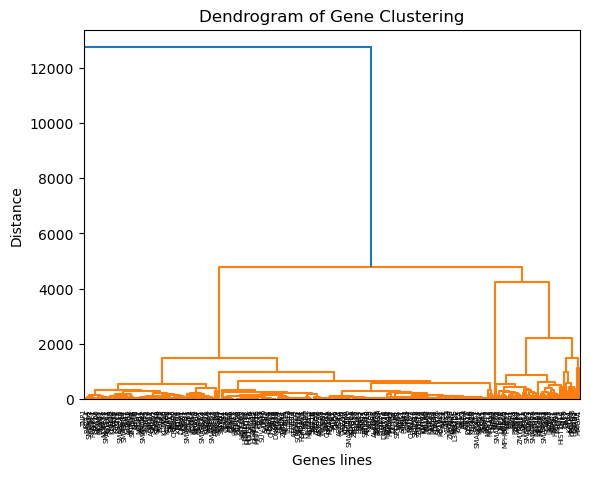

/Users/yunonapospelova/mambaforge/envs/DS/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/yunonapospelova/mambaforge/envs/DS/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


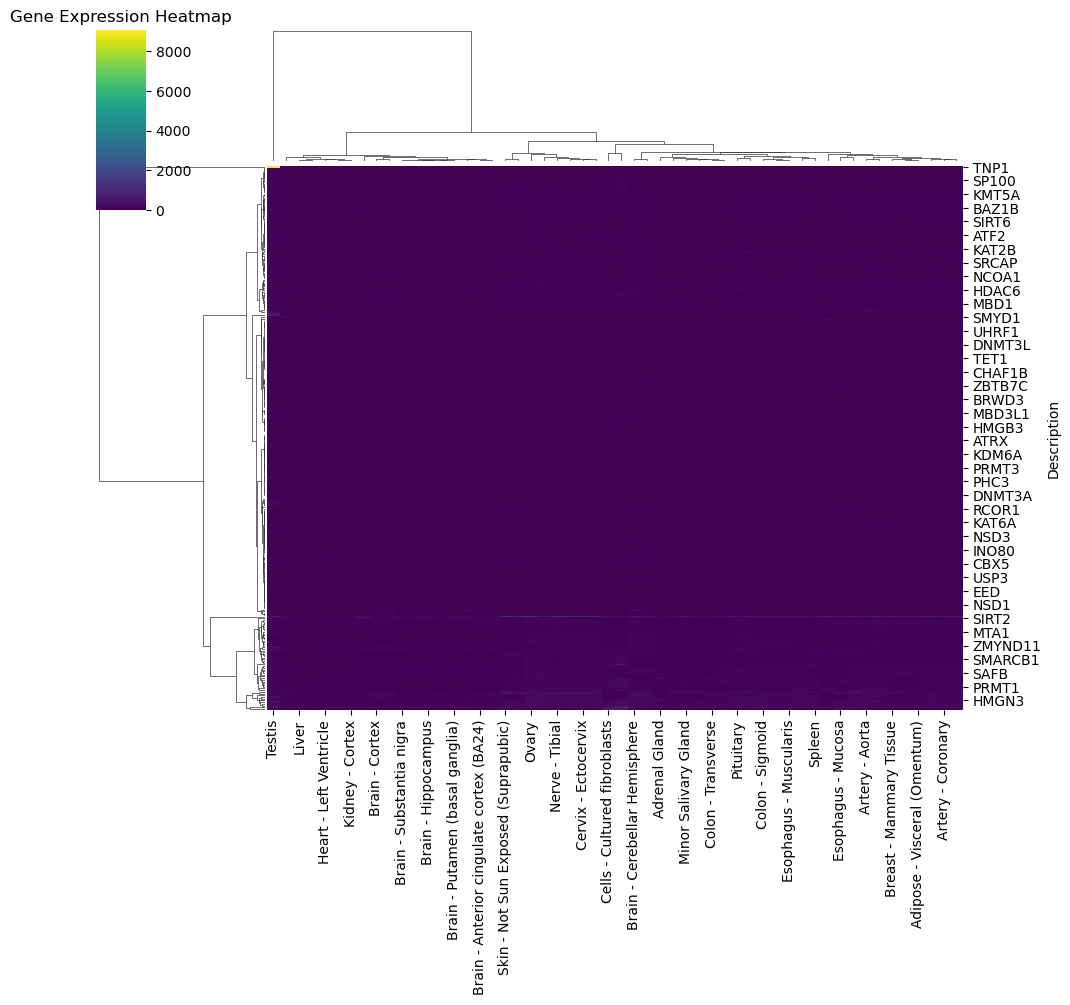

In [17]:
distance_matrix = pdist(expression_df.values, metric='euclidean')
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a dendrogram
dendrogram(linkage_matrix, labels=expression_df.index, orientation='top')
plt.xlabel('Genes lines')
plt.ylabel('Distance')
plt.title('Dendrogram of Gene Clustering')
plt.show()

# Create a heatmap
sns.clustermap(expression_df, method='ward', metric='euclidean', cmap='viridis')
plt.title('Gene Expression Heatmap')
plt.show()

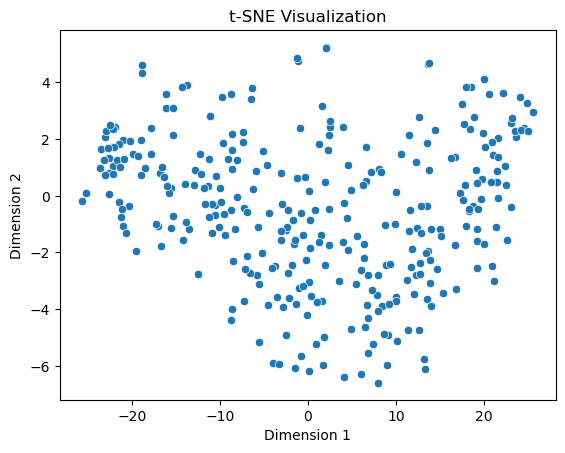

In [13]:
standardized_data = (expression_df - expression_df.mean()) / expression_df.std()

# Apply t-SNE
tsne = TSNE(n_components=2)  # You can adjust the number of components
tsne_result = tsne.fit_transform(standardized_data)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Visualize the t-SNE results
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=tsne_df)
plt.title('t-SNE Visualization')
plt.show()

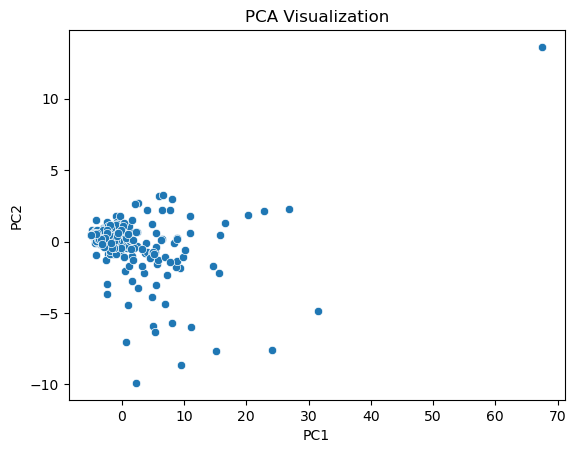

In [14]:
pca = PCA(n_components=2)  # You can adjust the number of components
pca_result = pca.fit_transform(standardized_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualize the PCA results
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Visualization')
plt.show()

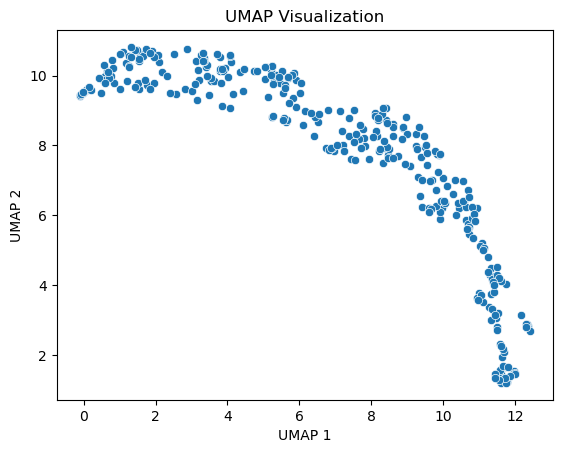

In [15]:
umap_model = umap.UMAP(n_components=2)  # You can adjust the number of components
umap_result = umap_model.fit_transform(standardized_data)

# Create a DataFrame with UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP 1', 'UMAP 2'])

# Visualize the UMAP results
sns.scatterplot(x='UMAP 1', y='UMAP 2', data=umap_df)
plt.title('UMAP Visualization')
plt.show()